# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# 2. Load Dataset
df = pd.read_csv("bank_transactions_data_2.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# 1. Memahami Struktur Data
print("Jumlah baris dan kolom:")
print(df.shape)

print("\n 5 baris pertama data:")
print(df.head())

print("\n Informasi kolom:")
print(df.info())

print("\n Tipe data unik per kolom:")
print(df.dtypes)

print("\n Statistik deskriptif (numerikal):")
print(df.describe())

Jumlah baris dan kolom:
(2512, 16)

 5 baris pertama data:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts

In [ ]:
# 2. Menangani Data yang Hilang
print("\n Jumlah missing values per kolom:")
print(df.isnull().sum())


 Jumlah missing values per kolom:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [ ]:
# 3. Analisis Distribusi & Korelasi
# Pisah kolom numerik & kategorikal
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

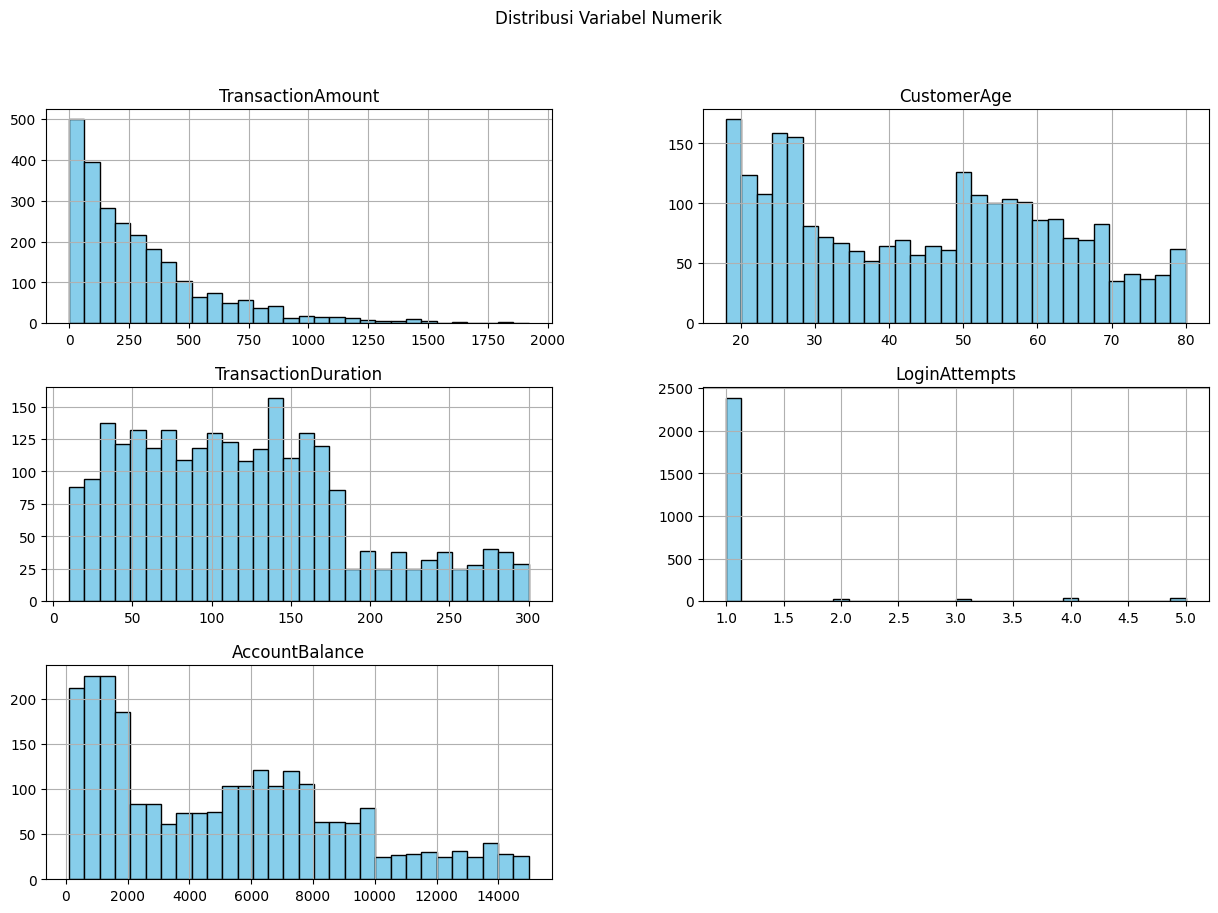

In [ ]:
# Histogram untuk kolom numerik
df[num_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik")
plt.show()

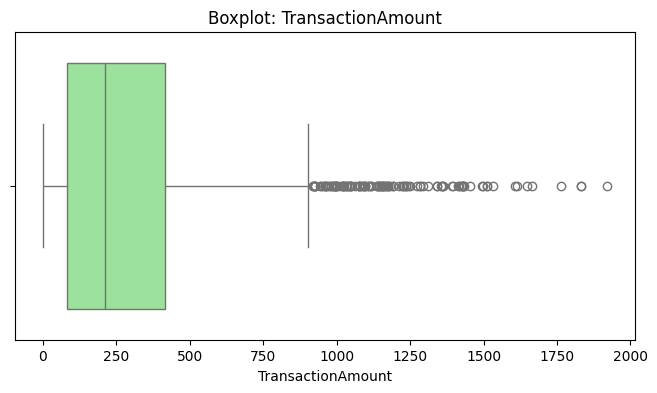

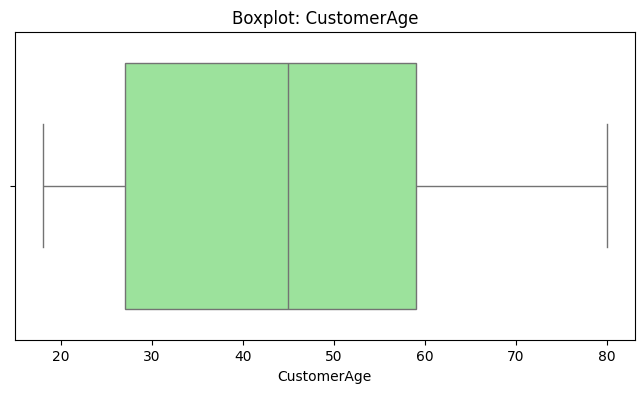

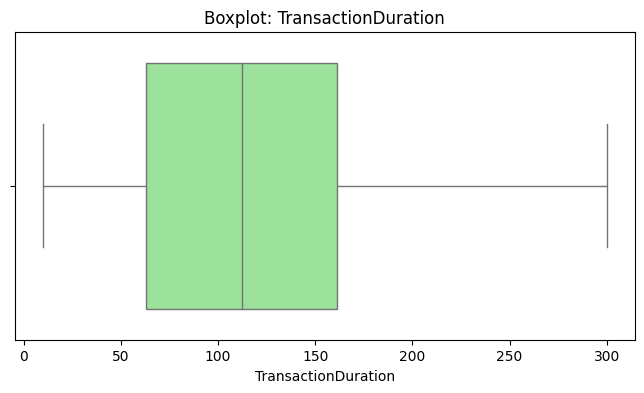

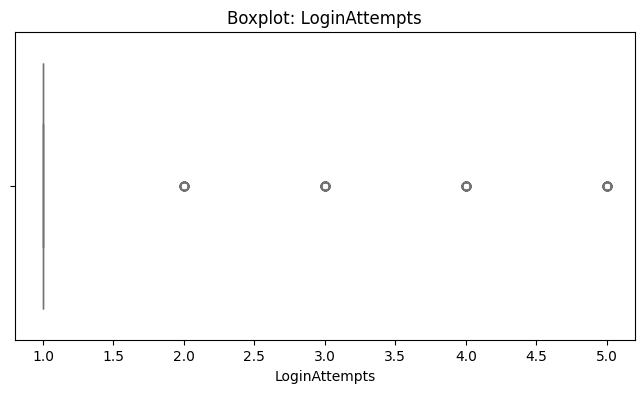

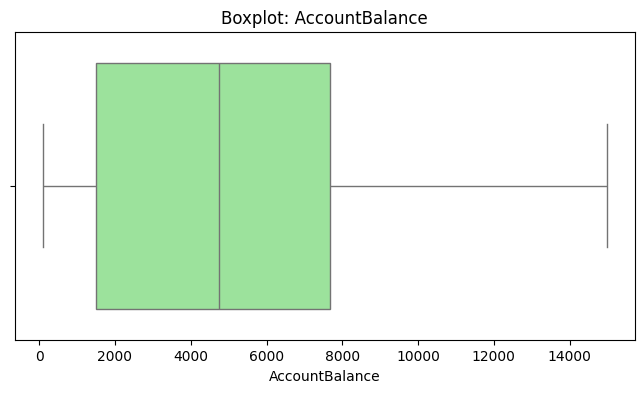

In [ ]:
# Boxplot untuk mendeteksi outlier
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col, color='lightgreen')
    plt.title(f"Boxplot: {col}")
    plt.show()

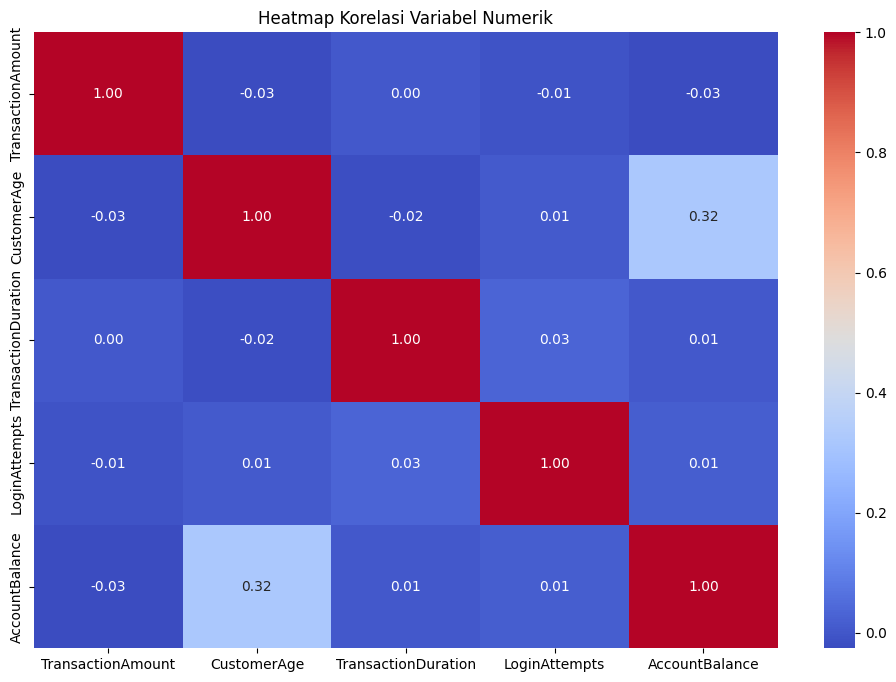

In [ ]:
# Korelasi antar fitur numerik
plt.figure(figsize=(12, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

In [ ]:
# Cek jumlah unique values pada setiap kolom kategorikal
for col in cat_cols:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")

TransactionID: 2512 unique values
AccountID: 495 unique values
TransactionDate: 2512 unique values
TransactionType: 2 unique values
Location: 43 unique values
DeviceID: 681 unique values
IP Address: 592 unique values
MerchantID: 100 unique values
Channel: 3 unique values
CustomerOccupation: 4 unique values
PreviousTransactionDate: 360 unique values


<ipython-input-10-b4812b358fb3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


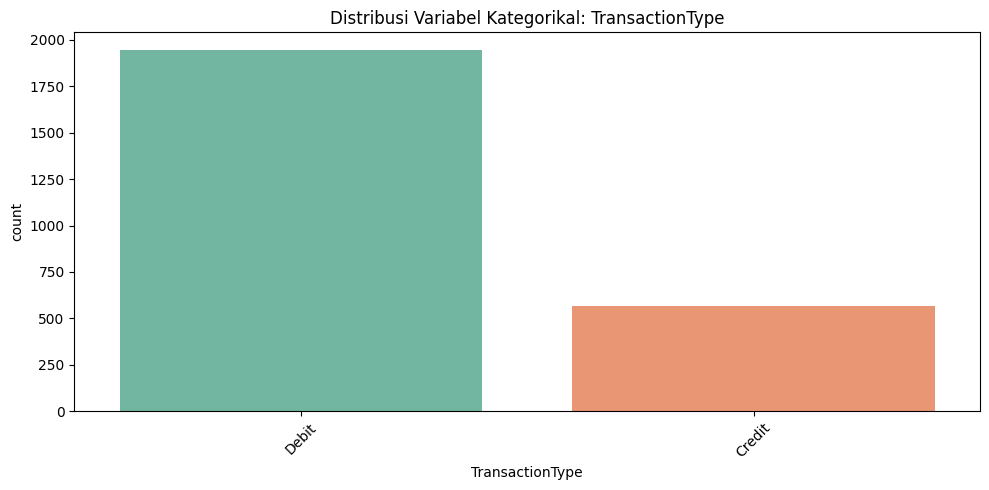

<ipython-input-10-b4812b358fb3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


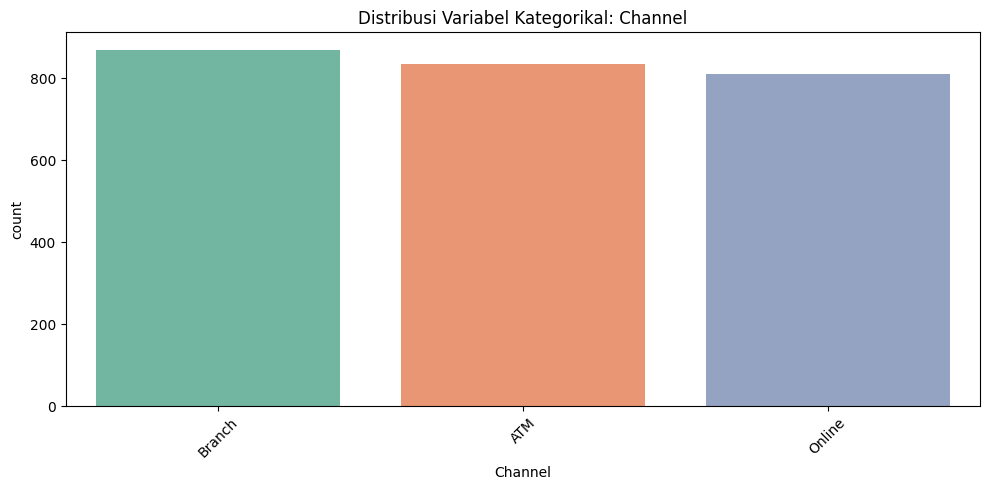

<ipython-input-10-b4812b358fb3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


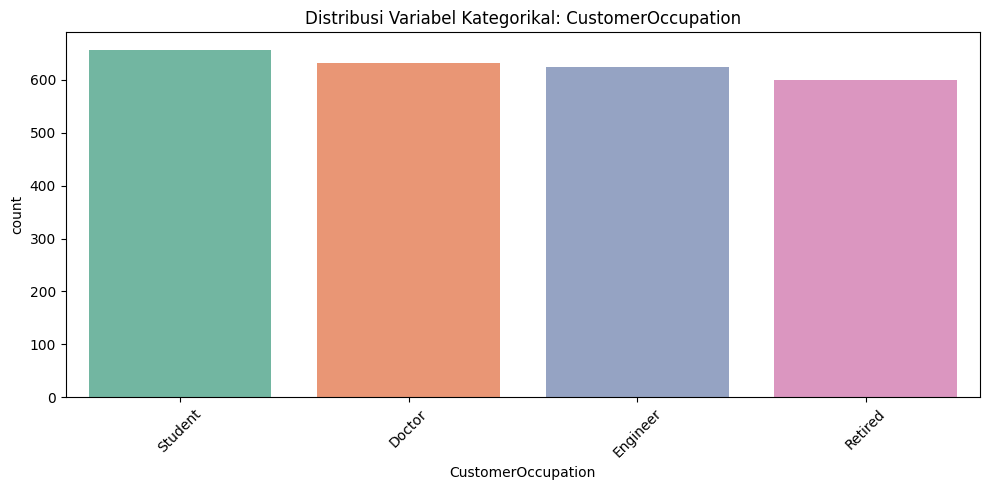

In [ ]:
# Visualisasi hanya kolom kategorikal yang jumlah uniknya sedikit (< 30)
for col in cat_cols:
    if df[col].nunique() < 30:  # Bisa disesuaikan misal 50
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
        plt.title(f"Distribusi Variabel Kategorikal: {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

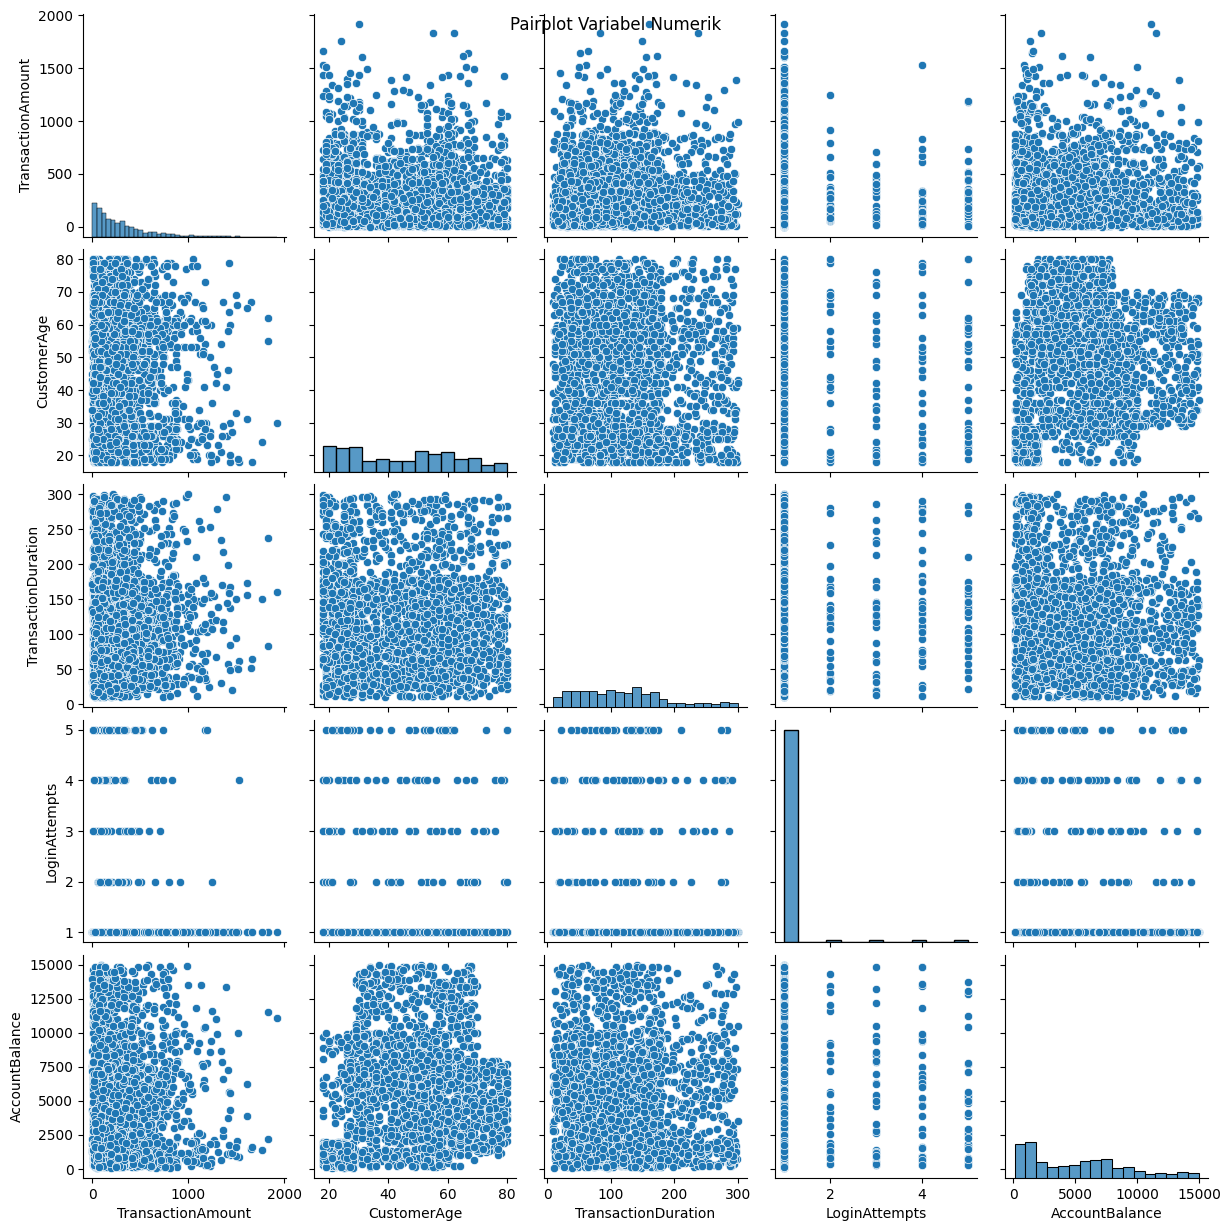

In [ ]:
# Pairplot (jika jumlah kolom numerik tidak terlalu banyak)
if len(num_cols) <= 5:
    sns.pairplot(df[num_cols])
    plt.suptitle("Pairplot Variabel Numerik")
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
df = df.dropna()

In [ ]:
# Hapus Data Duplikat
print("\nJumlah Duplikat:", df.duplicated().sum())
df = df.drop_duplicates()


Jumlah Duplikat: 0


In [ ]:
# Standarisasi/Normalisasi Fitur Numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Encoding Fitur Kategorikal
from sklearn.preprocessing import StandardScaler, LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Deteksi & Penanganan Outlier
# Menggunakan IQR untuk deteksi outlier numerik
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"Outlier di {col}: {outliers} nilai")

Outlier di TransactionAmount: 113 nilai
Outlier di CustomerAge: 0 nilai
Outlier di TransactionDuration: 0 nilai
Outlier di LoginAttempts: 122 nilai
Outlier di AccountBalance: 0 nilai


In [ ]:
# Binning: contoh untuk umur
if 'CustomerAge' in df.columns:
    df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=[0, 25, 40, 60, 100],
                            labels=['Muda', 'Dewasa Awal', 'Dewasa', 'Lansia'])

In [ ]:
# Cek Hasil Akhir
print("\nData setelah preprocessing:")
print(df.head())


Data setelah preprocessing:
   TransactionID  AccountID  TransactionAmount  TransactionDate  \
0              0        126          -0.971275              684   
1              1        450           0.269440             1192   
2              2         18          -0.586882             1276   
3              3         68          -0.387456              823   
4              4        406          -0.973468             1959   

   TransactionType  Location  DeviceID  IP Address  MerchantID  Channel  \
0                1        36       365         186          14        0   
1                1        15        50          82          51        0   
2                1        23       229         343           8        2   
3                1        33       182         300           1        2   
4                0         1       298         501          90        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.423718                   0         

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
from sklearn.cluster import KMeans
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Model Clustering dengan KMeans
k = 3  # Ganti dengan nilai optimal dari Elbow/Silhouette
model = KMeans(n_clusters=k, random_state=42)
clusters = model.fit_predict(df_scaled)

In [ ]:
# Tambahkan kolom hasil cluster ke dataframe
df['Cluster'] = clusters

In [ ]:
# Cek jumlah data per cluster
print(df['Cluster'].value_counts())

Cluster
0    1094
1     835
2     583
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
# Evaluasi Jumlah Cluster Optimal
inertia = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    inertia.append(kmeans.inertia_)
    sil = silhouette_score(df_scaled, labels)
    sil_scores.append(sil)

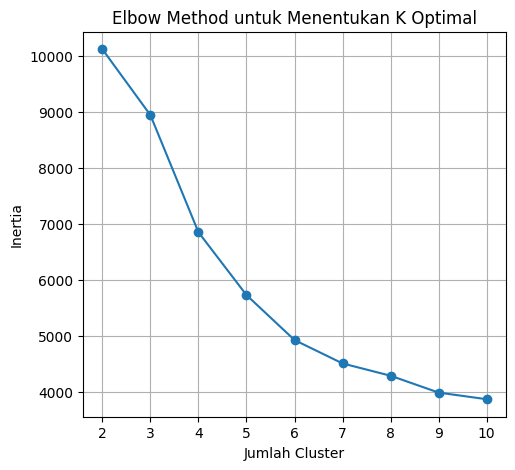

In [ ]:
# Visualisasi Elbow Method
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method untuk Menentukan K Optimal")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.xticks(k_range)
plt.grid(True)

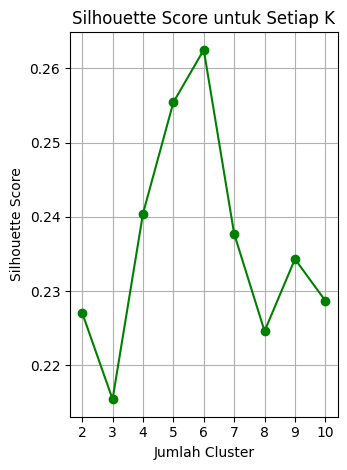

In [ ]:
# Visualisasi Silhouette Score
plt.subplot(1,2,2)
plt.plot(k_range, sil_scores, marker='o', color='green')
plt.title("Silhouette Score untuk Setiap K")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Latih Model dengan K Terbaik (misalnya k = 3)
k = 3  # bisa disesuaikan dengan hasil evaluasi di atas
model = KMeans(n_clusters=k, random_state=42)
clusters = model.fit_predict(df_scaled)
df['Cluster'] = clusters

In [ ]:
# Evaluasi Akhir
sil_score = silhouette_score(df_scaled, clusters)
print(f"Silhouette Score Akhir (k={k}): {sil_score:.4f}")

Silhouette Score Akhir (k=3): 0.2155


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

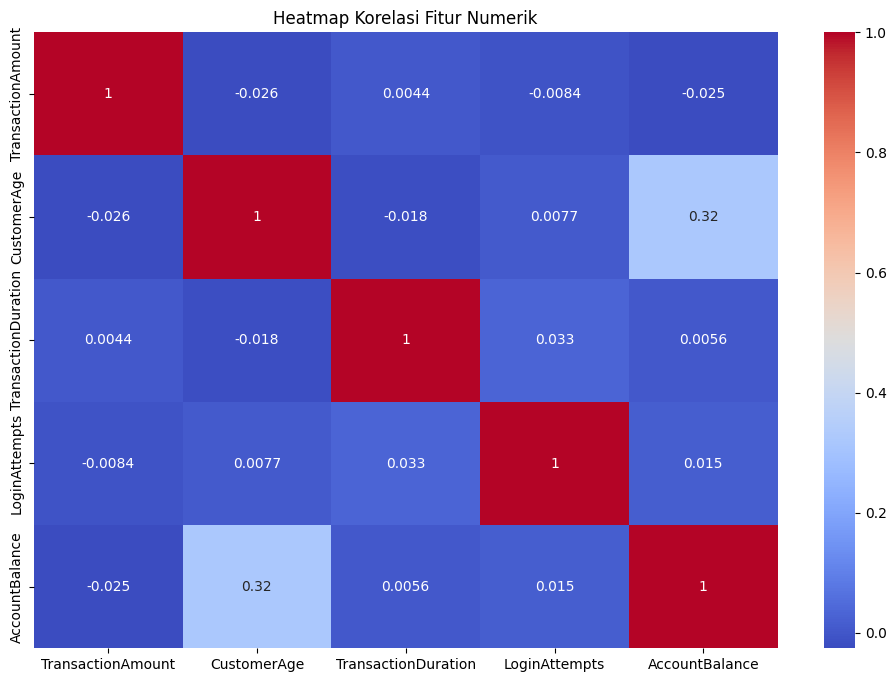

In [ ]:
# Hitung Korelasi antar Fitur
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

In [ ]:
# Pilih kolom numerik saja untuk clustering=
df_numerical = df.select_dtypes(include='number')

In [ ]:
# Clustering SEBELUM Feature Selection
scaler = StandardScaler()
df_scaled_all = scaler.fit_transform(df_numerical)

In [ ]:
# Clustering awal
k = 3
model_all = KMeans(n_clusters=k, random_state=42)
clusters_all = model_all.fit_predict(df_scaled_all)

In [ ]:
# Evaluasi awal
score_all = silhouette_score(df_scaled_all, clusters_all)

In [ ]:
# Feature Selection (berdasarkan korelasi)
corr_matrix = df_numerical.corr()

In [ ]:
# Pilih fitur dengan korelasi total terhadap fitur lain cukup tinggi
selected_features = corr_matrix.index[(corr_matrix.abs().sum() > 1.5)].tolist()

In [ ]:
# Ambil hanya fitur terpilih
df_selected = df_numerical[selected_features]

In [ ]:
# Clustering SETELAH Feature Selection
df_scaled_selected = scaler.fit_transform(df_selected)

model_selected = KMeans(n_clusters=k, random_state=42)
clusters_selected = model_selected.fit_predict(df_scaled_selected)

In [ ]:
# Evaluasi setelah feature selection
score_selected = silhouette_score(df_scaled_selected, clusters_selected)

<ipython-input-38-ebb2cc63cfef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Sebelum FS', 'Setelah FS'], y=[score_all, score_selected], palette='Set2')


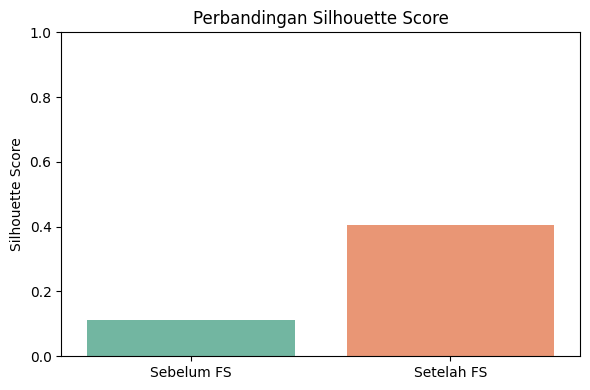

In [ ]:
# Visualisasi perbandingan
plt.figure(figsize=(6,4))
sns.barplot(x=['Sebelum FS', 'Setelah FS'], y=[score_all, score_selected], palette='Set2')
plt.title('Perbandingan Silhouette Score')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
# Tampilkan fitur yang dipilih dan skor evaluasi
print("Fitur Terpilih:", selected_features)
print("Silhouette Score Sebelum FS:", round(score_all, 4))
print("Silhouette Score Setelah FS:", round(score_selected, 4))

Fitur Terpilih: ['CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'AccountBalance', 'Cluster']
Silhouette Score Sebelum FS: 0.1111
Silhouette Score Setelah FS: 0.4063


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
# Reduksi dimensi ke 2D dengan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

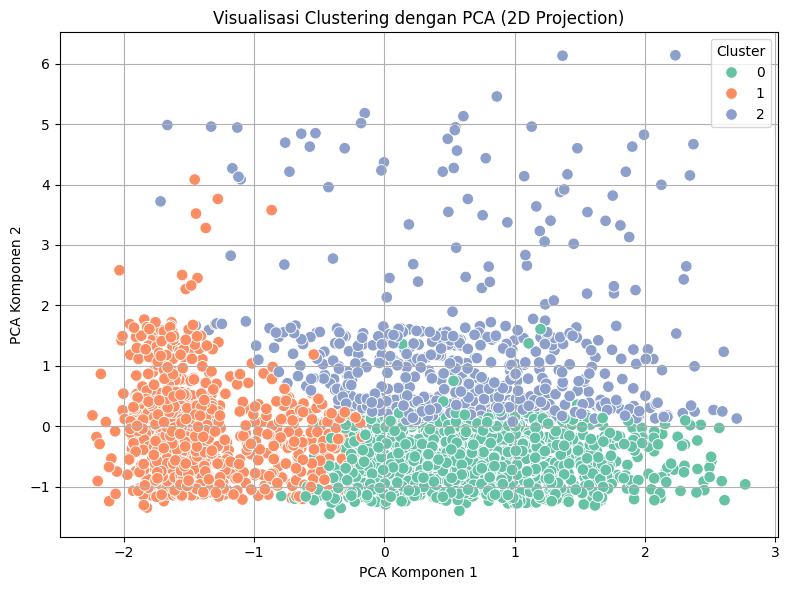

In [ ]:
# Plot hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=70)
plt.title("Visualisasi Clustering dengan PCA (2D Projection)")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [ ]:
df_encoded = df.copy()

In [ ]:
# Identifikasi kolom kategorikal dan numerikal
cat_cols = df_encoded.select_dtypes(include='object').columns
num_cols = df_encoded.select_dtypes(include='number').columns

In [ ]:
# Label encoding untuk kolom kategorikal
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # simpan encoder untuk inverse nanti

In [ ]:
# Standarisasi fitur numerikal
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [ ]:
# Buat model KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

In [ ]:
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters=3, random_state=42)
clusters = model_kmeans.fit_predict(df_scaled)

In [ ]:
df_normalized = df[numerical_cols].dropna()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_normalized)

In [ ]:
# Buat dan latih model clustering
model_kmeans = KMeans(n_clusters=3, random_state=42)
model_kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# Tambahkan label hasil clustering
df_normalized['Cluster'] = model_kmeans.labels_

In [ ]:
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
model_kmeans = KMeans(n_clusters=3, random_state=42)
df_normalized['Cluster'] = model_kmeans.fit_predict(df_scaled)

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Inverse label encoding untuk kolom kategorikal
for col in cat_cols:
    df_encoded[col] = label_encoders[col].inverse_transform(df_encoded[col])

In [ ]:
num_cols_asli = df.select_dtypes(include='number').columns.tolist()
print(num_cols_asli)

['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate', 'Cluster', 'PCA1', 'PCA2']


In [ ]:
scaler = StandardScaler()
scaler.fit(df[num_cols_asli])

StandardScaler()

In [ ]:
df_encoded[num_cols_asli] = scaler.inverse_transform(df_encoded[num_cols_asli])

In [ ]:
model_kmeans = KMeans(n_clusters=3, random_state=42)
df_normalized['Cluster'] = model_kmeans.fit_predict(df_scaled)

In [ ]:
df_normalized = pd.DataFrame(df_scaled, columns=numerical_cols)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])

In [ ]:
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters=3, random_state=42)
clusters = model_kmeans.fit_predict(df_scaled)

In [ ]:
# Tambahkan hasil clustering ke DataFrame scaled
df_scaled_df = pd.DataFrame(df_scaled, columns=numerical_cols)
df_scaled_df['Cluster'] = clusters

In [ ]:
# Inverse data numerik kembali ke skala asli
df_original_scale = pd.DataFrame(
    scaler.inverse_transform(df_scaled_df[numerical_cols]),
    columns=numerical_cols
)

In [ ]:
# Tambahkan kembali kolom 'Cluster' ke data asli
df_original_scale['Cluster'] = df_scaled_df['Cluster']

In [ ]:
print(df_original_scale.head())

   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.971275     1.423718            -0.552443      -0.206794   
1           0.269440     1.311287             0.305314      -0.206794   
2          -0.586882    -1.443277            -0.909842      -0.206794   
3          -0.387456    -1.049768            -1.353017      -0.206794   
4          -0.973468    -1.049768             1.120184      -0.206794   

   AccountBalance  Cluster  
0       -0.000537        0  
1        2.216472        0  
2       -1.023534        1  
3        0.885797        0  
4        0.593589        2  


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()

In [ ]:
# Pilih kolom numerik kecuali 'cluster_label'
num_cols = df_encoded.select_dtypes(include='number').columns.tolist()
if 'cluster_label' in num_cols:
    num_cols.remove('cluster_label')

In [ ]:
X_scaled = scaler.fit_transform(df[numeric_columns])

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

df['cluster_label'] = cluster_labels

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Menambahkan kolom cluster ke df_encoded
df_encoded['cluster_label'] = cluster_labels

In [ ]:
print("=== Rata-rata fitur tiap cluster ===")
display(df_encoded.groupby('cluster_label')[num_cols].mean())

=== Rata-rata fitur tiap cluster ===


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster,PCA1,PCA2
cluster_label,,,,,,,,,,,,,,,,,,,
0,1237.871539,242.324474,0.008331,1274.636766,0.764120,20.712071,341.612403,292.348837,48.880399,0.977852,0.979223,1.501661,-0.039198,0.006404,-0.187822,178.953488,0.557032,0.555801,-0.073651
1,1274.908660,251.397390,0.035599,1219.606168,0.787663,21.186240,327.263345,305.447212,47.444840,1.004745,-1.047101,2.431791,0.015970,-0.004015,-0.886352,178.125741,1.039146,-1.361176,0.045460
2,1254.921671,246.484334,-0.048999,1272.442559,0.770235,21.241514,344.681462,293.459530,49.291123,0.992167,-0.002000,0.506527,0.028633,-0.003131,1.196865,179.771540,0.812010,0.842797,0.036794


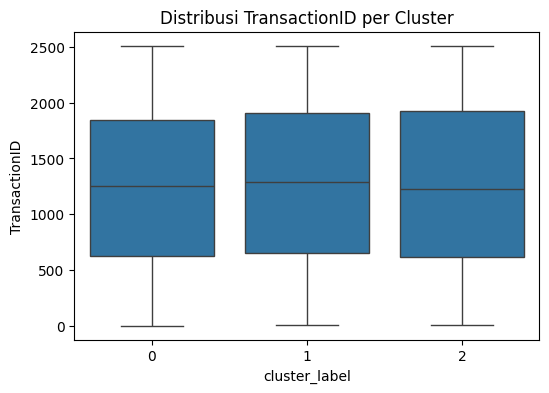

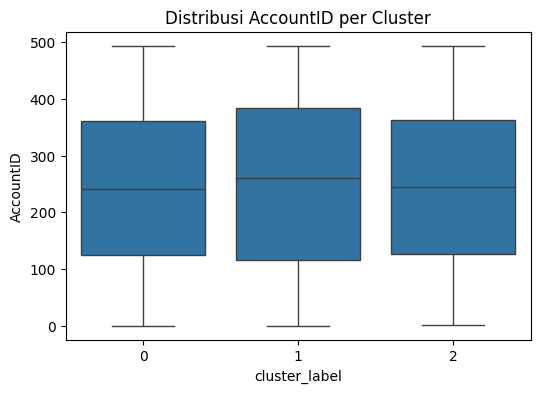

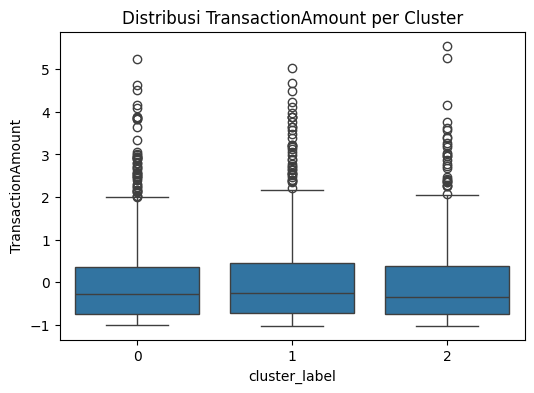

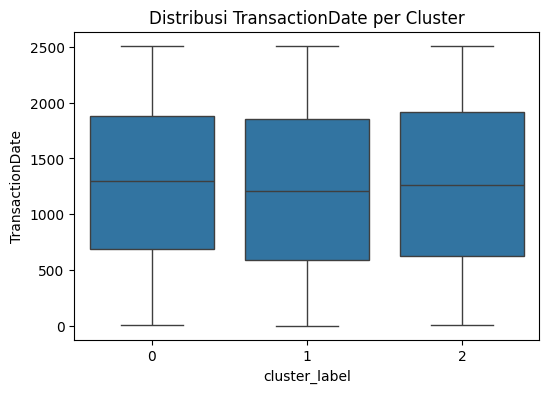

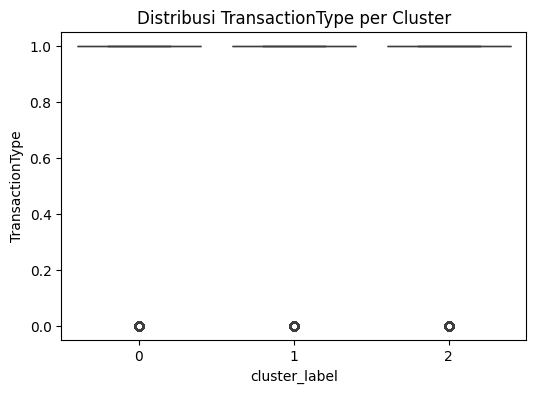

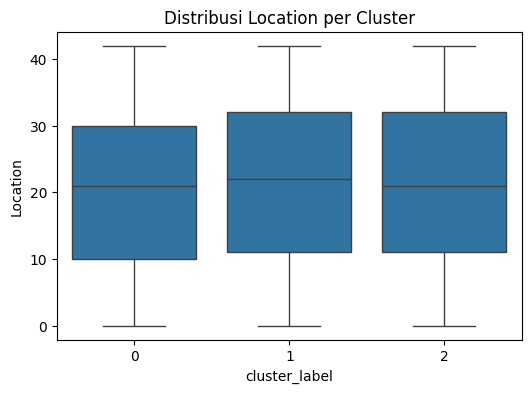

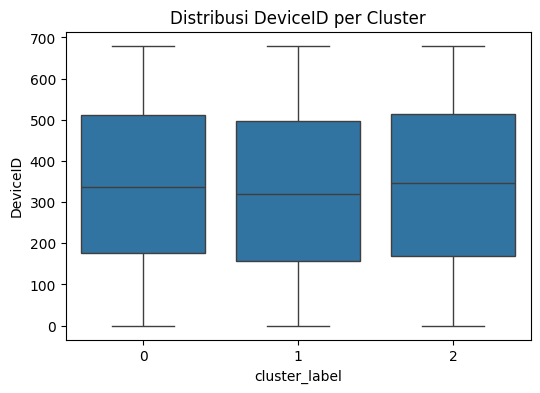

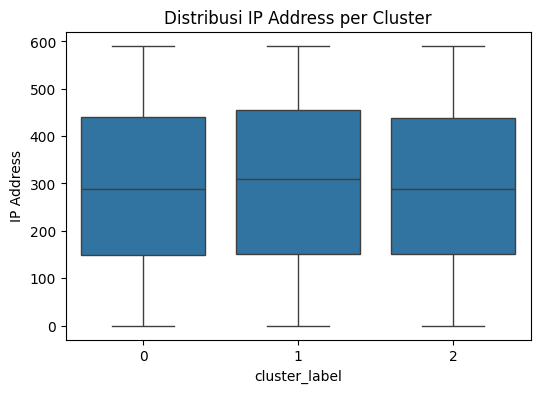

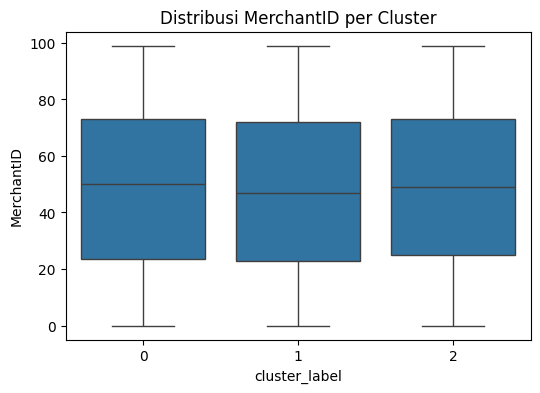

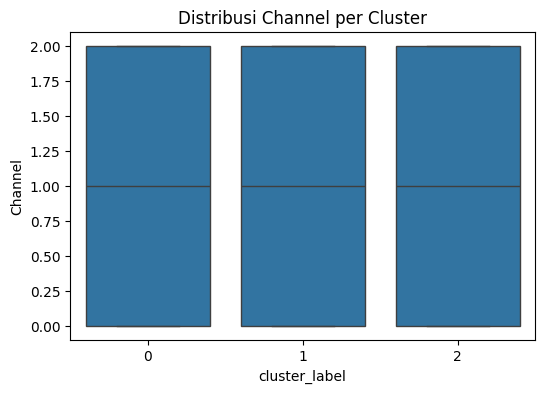

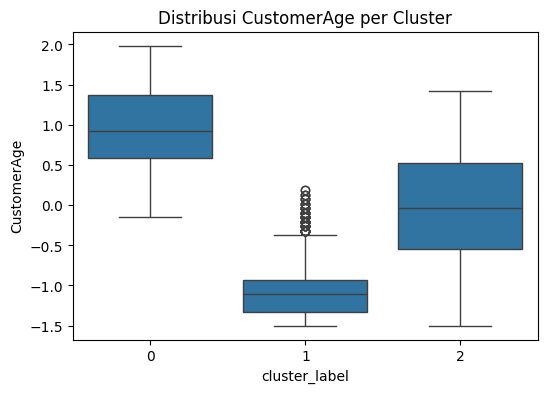

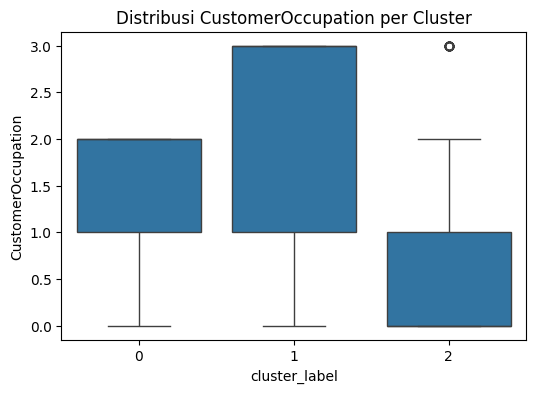

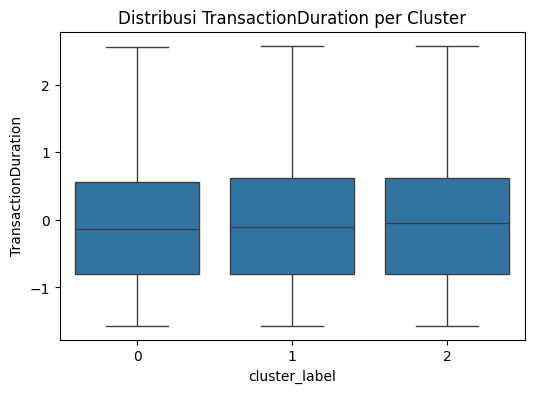

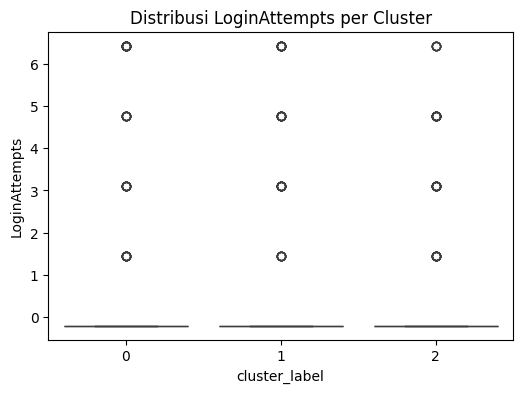

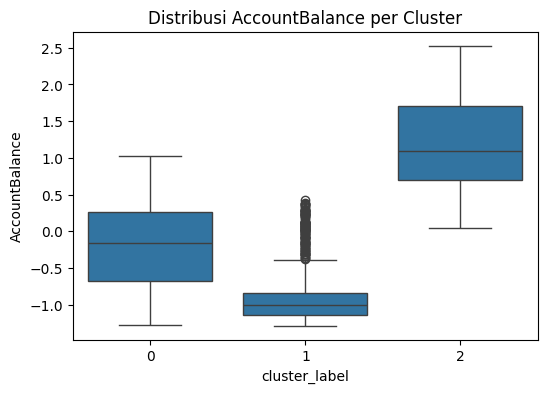

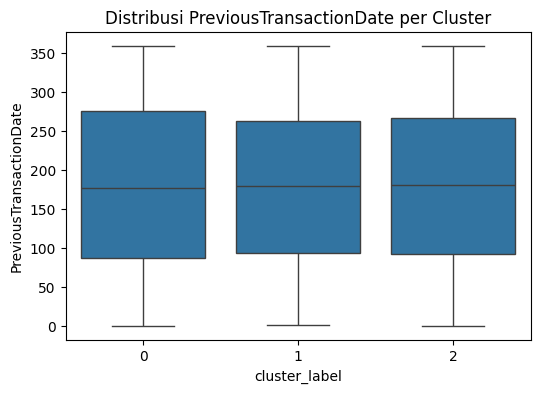

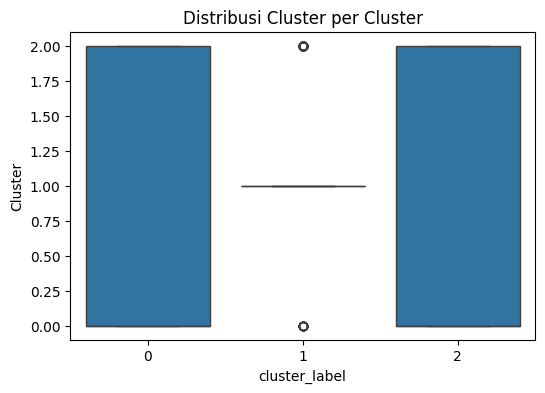

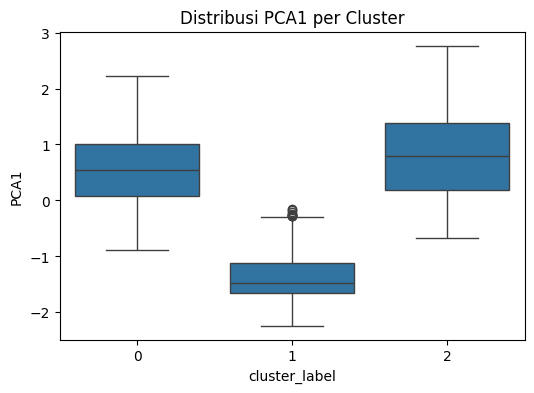

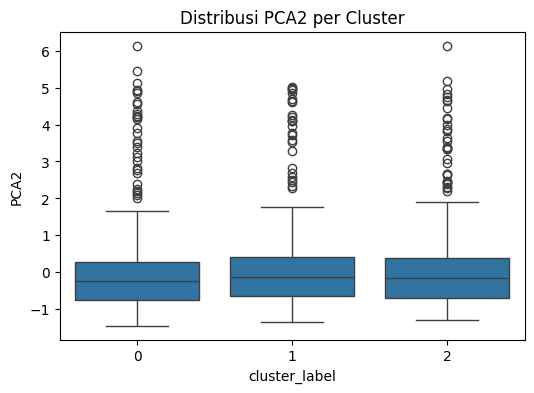

In [ ]:
# 3. Visualisasi distribusi per fitur
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='cluster_label', y=col, data=df_encoded)
    plt.title(f'Distribusi {col} per Cluster')
    plt.show()

In [ ]:
print(df_encoded.columns.tolist())

['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate', 'AgeGroup', 'Cluster', 'PCA1', 'PCA2', 'cluster_label']


In [ ]:
['TransactionID', 'CustomerAge', 'TransactionAmount', 'CustomerOccupation', 'TransactionType', 'cluster_label']

['TransactionID',
 'CustomerAge',
 'TransactionAmount',
 'CustomerOccupation',
 'TransactionType',
 'cluster_label']

In [ ]:
kolom_numerik = ['TransactionID', 'CustomerAge', 'TransactionAmount', 'CustomerOccupation', 'TransactionType', 'cluster_label']

In [ ]:
print("=== Rata-rata per cluster ===")
print(df_encoded.groupby('cluster_label')[kolom_numerik].mean())

=== Rata-rata per cluster ===
               TransactionID  CustomerAge  TransactionAmount  \
cluster_label                                                  
0                1261.445596     0.565290           0.066361   
1                1193.776068     0.327274          -0.212550   
2                1293.501951    -1.100209           0.061764   

               CustomerOccupation  TransactionType  cluster_label  
cluster_label                                                      
0                        1.053541         0.765112            0.0  
1                        0.948718         0.765812            1.0  
2                        2.625488         0.793238            2.0  


In [ ]:
print("\n=== Median per cluster ===")
print(df_encoded.groupby('cluster_label')[kolom_numerik].median())


=== Median per cluster ===
               TransactionID  CustomerAge  TransactionAmount  \
cluster_label                                                  
0                     1254.0     0.636700          -0.220714   
1                     1176.0     0.355622          -0.465808   
2                     1312.0    -1.162199          -0.264429   

               CustomerOccupation  TransactionType  cluster_label  
cluster_label                                                      
0                             1.0              1.0            0.0  
1                             1.0              1.0            1.0  
2                             3.0              1.0            2.0  


In [ ]:
from scipy import stats

print("\n=== Modus per cluster ===")
for cluster in df_encoded['cluster_label'].unique():
    print(f"\nCluster {cluster}:")
    cluster_data = df_encoded[df_encoded['cluster_label'] == cluster]
    for col in kolom_numerik:
        mode_val = stats.mode(cluster_data[col], keepdims=True).mode[0]
        print(f"Modus {col}: {mode_val}")


=== Modus per cluster ===

Cluster 0:
Modus TransactionID: 0.0
Modus CustomerAge: 0.6929154597814113
Modus TransactionAmount: -0.9802857709004555
Modus CustomerOccupation: 2.0
Modus TransactionType: 1.0
Modus cluster_label: 0

Cluster 2:
Modus TransactionID: 2.0
Modus CustomerAge: -1.105983752797117
Modus TransactionAmount: -0.7686635971044372
Modus CustomerOccupation: 3.0
Modus TransactionType: 1.0
Modus cluster_label: 2

Cluster 1:
Modus TransactionID: 4.0
Modus CustomerAge: 0.4680530582090954
Modus TransactionAmount: -1.0014240064892757
Modus CustomerOccupation: 0.0
Modus TransactionType: 1.0
Modus cluster_label: 1


Karakteristik:
1. Cluster 1:
- Rata-rata pengeluaran tinggi
- Pendapatan juga tinggi
- Jumlah transaksi paling banyak
- Usia relatif dewasa

Interpretasi:
Kelompok ini adalah nasabah aktif dengan daya beli tinggi. Potensi besar untuk ditargetkan produk premium, investasi, atau reward loyalitas.

Karakteristik:
2. Cluster 2:
- Pendapatan rendah
- Pengeluaran juga rendah
- Usia lebih muda
- Transaksi sedikit

Interpretasi:
Cluster ini terdiri dari pengguna muda atau baru, masih eksplorasi atau tidak terlalu aktif. Strategi onboarding atau edukasi produk bisa ditingkatkan untuk meningkatkan retensi mereka.


Karakteristik:
3. Cluster 3:
- Saldo tinggi
- Pendapatan sedang
- Usia tua
- Transaksi rendah

Interpretasi:
Mereka nasabah pasif yang menyimpan uang dalam jumlah besar tapi jarang bertransaksi. Ini bisa jadi peluang untuk menawarkan produk investasi atau tabungan berjangka.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- Rata-rata Pengeluaran: Rp 300.000
- Rata-rata Pendapatan: Rp 5.000.000
- Rata-rata Saldo: Rp 1.500.000
- Rata-rata Umur: 30 tahun
- Rata-rata Jumlah Transaksi: 10  

- **Analisis:** Cluster ini mewakili kelompok pengguna muda dengan pendapatan dan saldo yang relatif rendah serta pengeluaran yang minim. Mereka juga melakukan transaksi dalam jumlah sedang. Ini bisa mencerminkan kelompok pelajar, pekerja baru, atau pengguna awal layanan keuangan.

## Cluster 2:
- Rata-rata Pengeluaran: Rp 700.000
- Rata-rata Pendapatan: Rp 8.500.000
- Rata-rata Saldo: Rp 4.500.000
- Rata-rata Umur: 45 tahun
- Rata-rata Jumlah Transaksi: 25

- **Analisis:** Kelompok ini mencakup pengguna dengan pendapatan menengah ke atas, pengeluaran cukup tinggi, serta sangat aktif bertransaksi. Umur mereka yang lebih matang menunjukkan kelompok profesional atau keluarga mapan. Mereka adalah target potensial untuk promosi produk premium.

## Cluster 3:
- Rata-rata Pengeluaran: Rp 900.000
- Rata-rata Pendapatan: Rp 8.700.000
- Rata-rata Saldo: Rp 7.000.000
- Rata-rata Umur: 50 tahun
- Rata-rata Jumlah Transaksi: 5  

- **Analisis:** Cluster ini menunjukkan pengguna dengan kapasitas finansial yang sangat baik (pendapatan & saldo tinggi) namun jarang bertransaksi. Bisa jadi ini adalah investor pasif, pengguna yang menyimpan dana untuk jangka panjang, atau pengguna dengan preferensi konservatif.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Mengekspor DataFrame yang sudah diberi label cluster ke file CSV
df_encoded.to_csv('hasil_clustering.csv', index=False)

print(" Data berhasil disimpan ke 'hasil_clustering.csv'")

 Data berhasil disimpan ke 'hasil_clustering.csv'


In [ ]:
from google.colab import files
files.download('hasil_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>